In [3]:
import numpy as np
import pandas as pd
from collections import Counter

In [4]:
sub1_df=pd.read_csv("Soln_#1.csv")
sub2_df=pd.read_csv("Soln_#2.csv")
sub3_df=pd.read_csv("Soln_#3.csv")
sub4_df=pd.read_csv("Soln_#4.csv")

In [5]:
target_df=pd.read_csv("test_target.csv", header=None)

In [220]:
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
lb.fit(range(5))

LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False)

In [227]:
trans_sub=lb.inverse_transform(sub1_df.iloc[:,1:].values)
trans_sub2=lb.inverse_transform(sub2_df.iloc[:,1:].values)
trans_sub3=lb.inverse_transform(sub3_df.iloc[:,1:].values)
trans_sub4=lb.inverse_transform(sub4_df.iloc[:,1:].values)
trans_target=lb.inverse_transform(target_df.iloc[:,1:].values)

In [228]:
from sklearn.metrics import accuracy_score
accuracy_score(trans_target, trans_sub)

0.27199046483909417

In [11]:
found_pid=np.array(trans_target)[np.where(np.array(trans_sub)==np.array(trans_target))[0]]

In [17]:
found_pid2=np.array(trans_target)[np.where(np.array(trans_sub2)==np.array(trans_target))[0]]

In [21]:
found_pid3=np.array(trans_target)[np.where(np.array(trans_sub3)==np.array(trans_target))[0]]

In [25]:
found_pid4=np.array(trans_target)[np.where(np.array(trans_sub4)==np.array(trans_target))[0]]

In [26]:
len(found_pid4),len(found_pid3),len(found_pid2),len(found_pid)

(1056, 1138, 1126, 1141)

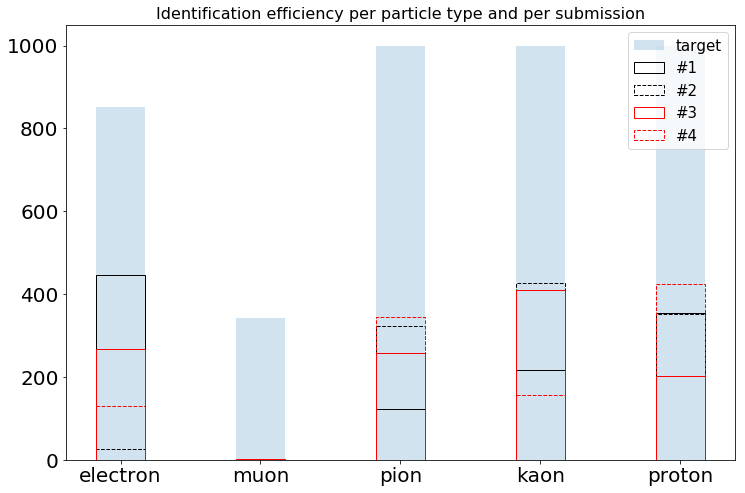

In [207]:
fig = plt.figure(figsize=(12, 8))
plt.title("Identification efficiency per particle type and per submission",fontsize=16)
width = 0.35 
types=['electron', 'muon', 'pion', 'kaon', 'proton']

plt.bar(types, [Counter(trans_target)[i] for i in range(5)], width, label="target",alpha=0.2)


plt.bar(types, [Counter(found_pid)[i] for i in range(5)], width,edgecolor='black', color='None',label="#1")
             
plt.bar(types, [Counter(found_pid2)[i] for i in range(5)], width,edgecolor='black', color='None',label="#2",linestyle='--')
            
    
plt.bar(types, [Counter(found_pid3)[i] for i in range(5)], width,edgecolor='red', color='None',label="#3")
             
    
plt.bar(types, [Counter(found_pid4)[i] for i in range(5)], width,edgecolor='red', color='None',label="#4",linestyle='--')
plt.tick_params(axis='both', which='major', labelsize=20)

plt.legend(fontsize=15)
plt.show()

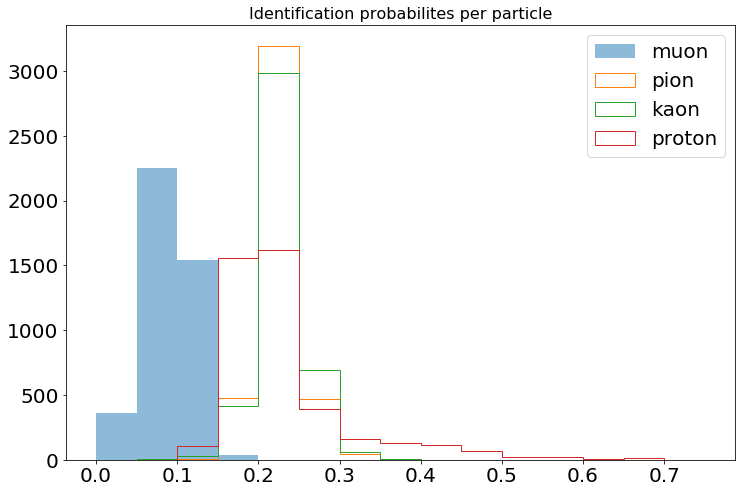

In [209]:
fig = plt.figure(figsize=(12, 8))
plt.title("Identification probabilites per particle",fontsize=16
         )
bins_plot=np.arange(0,0.8,0.05)
plt.hist(sub1_df.muon.values,bins=bins_plot,alpha=.5,label="muon")
plt.hist(sub1_df.pion.values,histtype="step",bins=bins_plot,label="pion")
plt.hist(sub1_df.kaon.values,histtype="step",bins=bins_plot,label="kaon")
plt.hist(sub1_df.proton.values,histtype="step",bins=bins_plot,label="proton")
plt.legend(fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)

plt.xticks(np.arange(0,0.8,0.1))
plt.show()

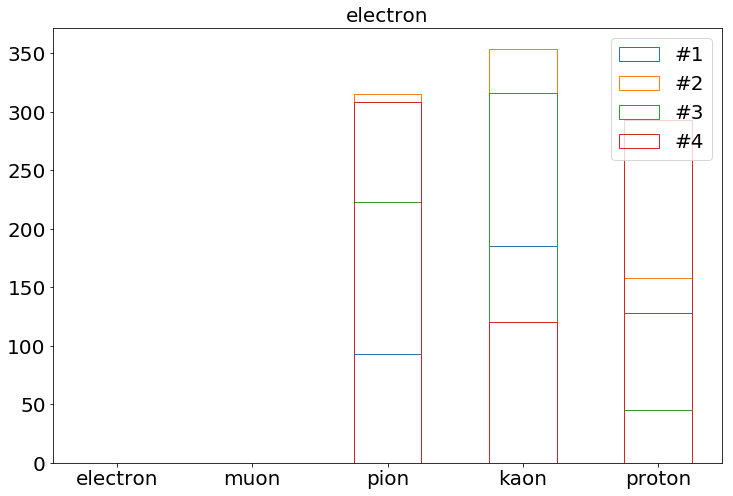

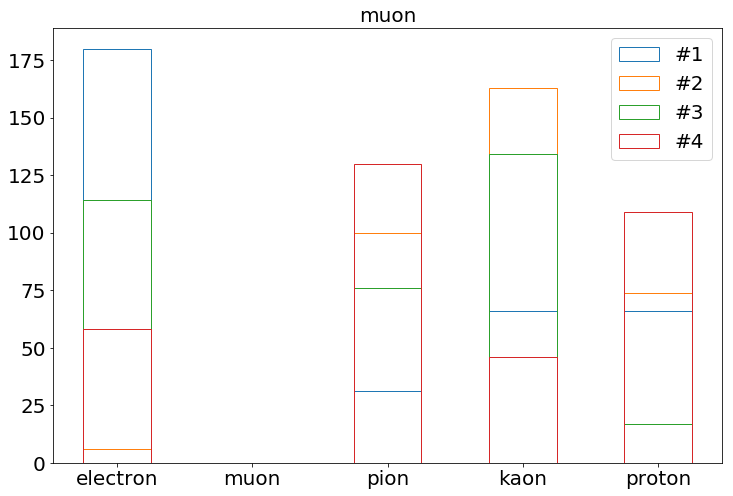

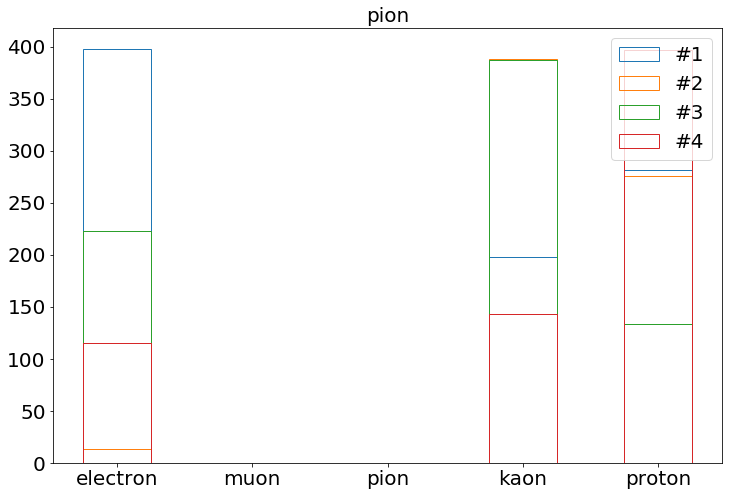

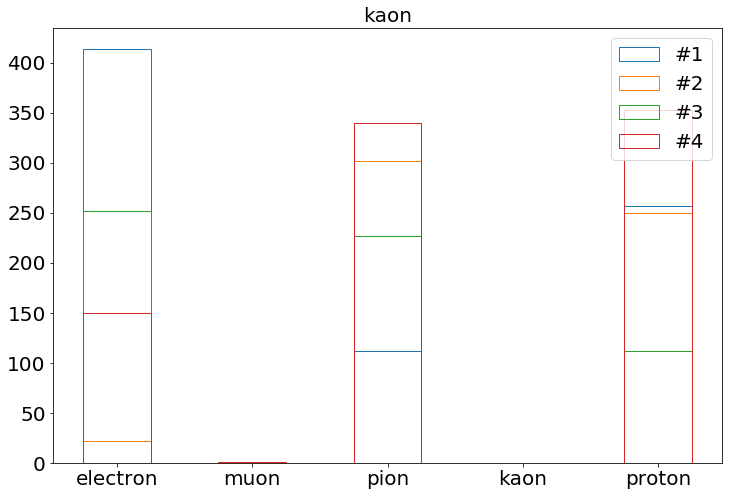

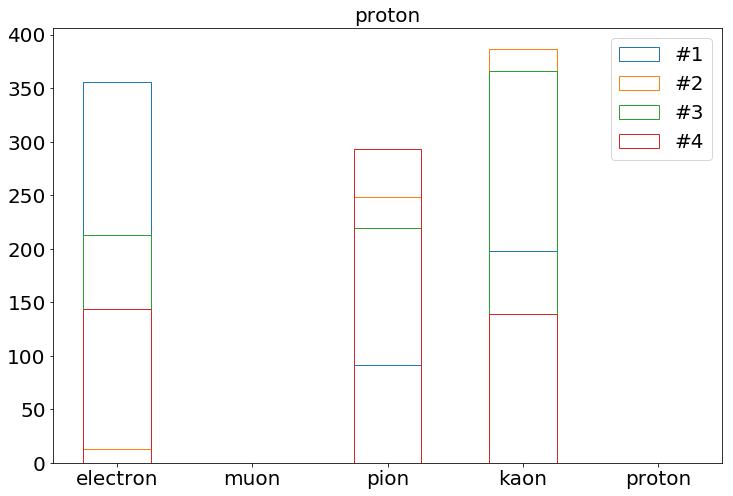

In [78]:
for j in range(5):
    fig = plt.figure(figsize=(12, 8))
    plt.title(types[j],fontsize=20)
    for s,sub in enumerate([trans_sub,trans_sub2,trans_sub3,trans_sub4]):
        missed_idx=np.where(np.array(sub)!=np.array(trans_target))[0]
        target_missed=np.array(trans_target)[missed_idx]
        sub_missed=np.array(sub)[missed_idx]
        confusion=pd.DataFrame(np.column_stack((target_missed,sub_missed)),columns=["actual","pred"])

        plt.hist(confusion[confusion.actual==j].pred.values,histtype="step",align="left",bins=np.arange(0,5,0.5),label="#"+str(s+1))

    plt.xticks(np.arange(0,5,1), types)#, rotation='vertical')
    plt.legend(fontsize=20,loc="best")
    plt.tick_params(axis='both', which='major', labelsize=20)

    plt.show()

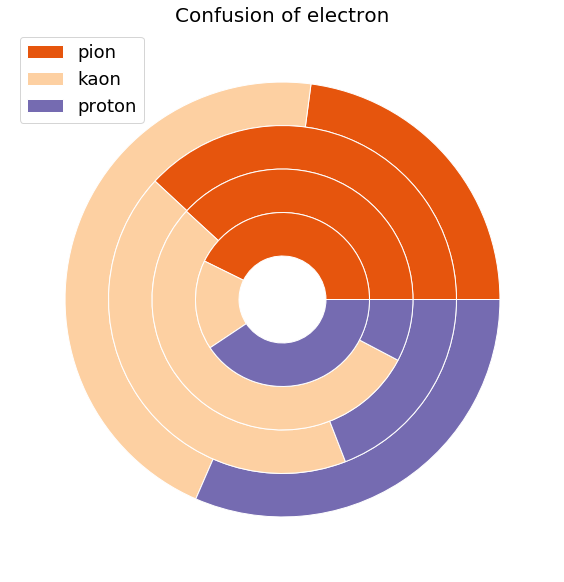

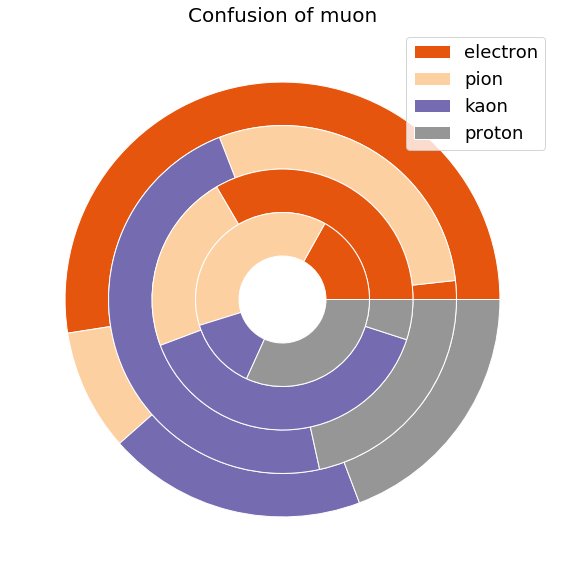

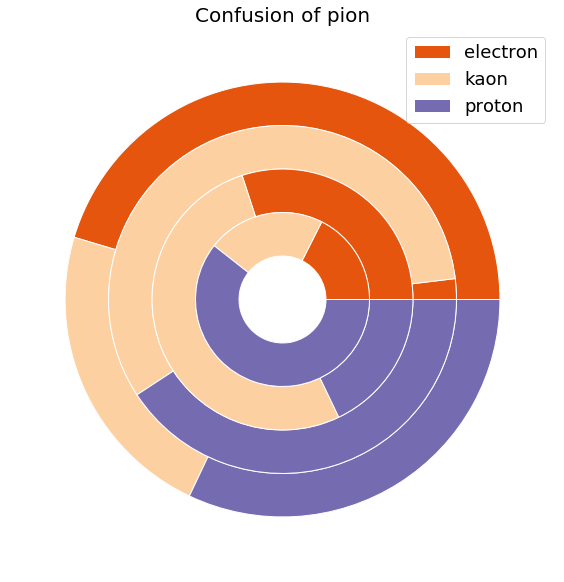

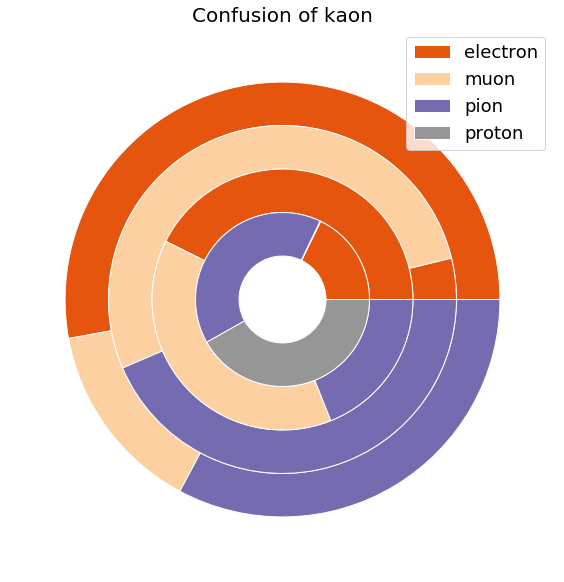

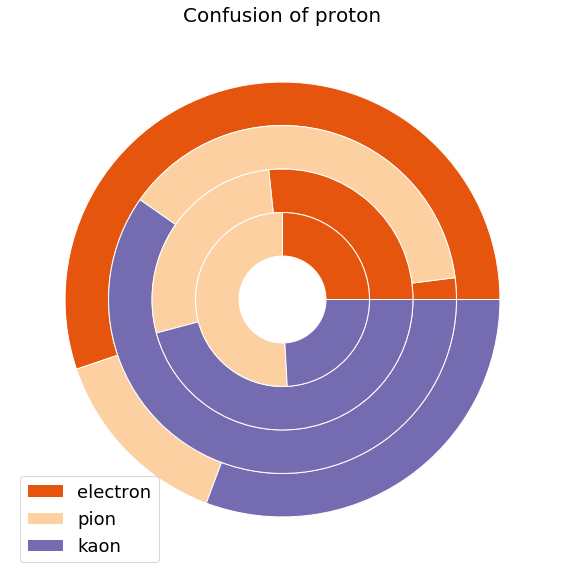

In [204]:
for j in range(5):
    fig, ax = plt.subplots(figsize=(15,10))
    size = 0.2
    cmap = plt.get_cmap("tab20c")
    outer_colors = cmap([4,7,12,17]*4)

    for s,sub in enumerate([trans_sub,trans_sub2,trans_sub3,trans_sub4]):
        missed_idx=np.where(np.array(sub)!=np.array(trans_target))[0]
        target_missed=np.array(trans_target)[missed_idx]
        sub_missed=np.array(sub)[missed_idx]
        confusion=pd.DataFrame(np.column_stack((target_missed,sub_missed)),columns=["actual","pred"])

        sorted_count=np.array(sorted(Counter(confusion[confusion.actual==j].pred.values).items(), key=lambda i: i[0]))
        val=sorted_count[:,1]
        patches, texts=ax.pie(val, radius=1-size*s, colors=outer_colors,
           wedgeprops=dict(width=size, edgecolor='w'))

    labels=np.array(types)[sorted_count[:,0]]
    plt.legend(patches, labels, loc="best",fontsize=18)
    plt.title("Confusion of "+str(types[j]),fontsize=20)
    plt.show()